# Importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import os

# Se necessário, padronização de valores:
from sklearn.preprocessing import StandardScaler

# Aquisição Dos Dados


In [2]:
url = r'Crop_Recommendation.csv'
dados_brutos = pd.read_csv(url)
dados_brutos_bkup = dados_brutos.copy(deep=True)

In [3]:
dados_brutos.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


# Análise Exploratória dos Dados

In [4]:
dados_brutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
# O método, de objeto DataFrame, .info() indica um fator importante na forma com que os dados foram trabalhados no dataset: Não existem
# valores nulos em nenhuma coluna. Todos as entradas de dados estão integralmente preenchidas em todas as colunas. Isso não exclui, 
# entretanto, a possibilidade de existir valores duplicados e/ou valores com tipagem errada - as colunas, no entanto, tem o tipo condizente
# com o conteúdo.

In [6]:
# Agrupando por colheita, crop, (inclusive, traduzir as colunas será um próximo passo, já que os comentários estão em português), é possível
# extrais em insights de todos os outros parâmetros. Que plantação depende de um solo mais rico em nitrogenio, fosfóro ou potássio? A 
# influência da tempepratura, humidade, ph do solo e milimetragem da chuva. Entender que tipo de plantação depende mais de que, vai definir
# uma boa noção a respeito do funcionamento do modelo, e sobre o quão efetivo foi o seu treinamento no final do notebook.

## Traduzindo as Colunas

In [7]:
dados_brutos.columns = ['Nitrogenio','Fosforo','Potassio','Temperatura','Umidade','Valor_pH','Chuva_mm','Colheita']

In [8]:
dados_brutos.columns

Index(['Nitrogenio', 'Fosforo', 'Potassio', 'Temperatura', 'Umidade',
       'Valor_pH', 'Chuva_mm', 'Colheita'],
      dtype='object')

## Traduzindo Valores de Colheitas e Criando Dicionário 

In [9]:
dados_brutos['Colheita'].unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [10]:
colheita_dict = {
    "Rice":"Arroz",
    "Maize":"Milho",
    "ChickPea":"Grão_de_bico",
    "KidneyBeans":"Feijão_vermelho",
    "PigeonPeas":"Guandu",
    "MothBeans":"Vigna_aconitifolia",
    "MungBean":"Feijão_mungu_verde",
    "Blackgram":"Feijão_preto",
    "Lentil":"Lentilha",
    "Pomegranate":"Romã",
    "Banana":"Banana",
    "Mango":"Manga",
    "Grapes":"Uva",
    "Watermelon":"Melancia",
    "Muskmelon":"Melão",
    "Apple":"Maça",
    "Orange":"Laranja",
    "Papaya":"Mamão",
    "Coconut":"Coco",
    "Cotton":"Algodão",
    "Jute":"Juta",
    "Coffee":"Café"
}

In [11]:
dados_brutos.replace(colheita_dict, inplace=True)

In [12]:
dados_brutos.duplicated().sum()

0

In [13]:
# Já traduzido, verifiquei a quantidade de dados duplicados. O retorno, tal qual o de valores nulos, é de zero valores. Assim, o tratamento
# será mais fácil e rápido.

## Construindo Filtros para Visualização

In [14]:
dados_brutos['Colheita'].unique()

array(['Arroz', 'Milho', 'Grão_de_bico', 'Feijão_vermelho', 'Guandu',
       'Vigna_aconitifolia', 'Feijão_mungu_verde', 'Feijão_preto',
       'Lentilha', 'Romã', 'Banana', 'Manga', 'Uva', 'Melancia', 'Melão',
       'Maça', 'Laranja', 'Mamão', 'Coco', 'Algodão', 'Juta', 'Café'],
      dtype=object)

### Taxa média de nitrogenio por tipo de colheita

In [15]:
filtro_1 = dados_brutos.groupby("Colheita").mean(numeric_only=True)['Nitrogenio'].sort_values(ascending=False)

In [16]:
dados_brutos.groupby("Colheita").std(numeric_only=True)['Nitrogenio'].sort_values(ascending=False)

Colheita
Feijão_preto          12.664258
Romã                  12.617652
Melancia              12.565127
Uva                   12.466829
Café                  12.345203
Manga                 12.329037
Mamão                 12.219607
Lentilha              12.196915
Melão                 12.176215
Grão_de_bico          12.150649
Milho                 11.949490
Laranja               11.941930
Arroz                 11.917981
Maça                  11.863704
Guandu                11.849950
Coco                  11.761931
Algodão               11.628817
Feijão_mungu_verde    11.510641
Vigna_aconitifolia    11.343418
Banana                11.107241
Juta                  10.968274
Feijão_vermelho       10.834266
Name: Nitrogenio, dtype: float64

### Taxa média de fósforo por tipo de colheita

In [17]:
filtro_2 = dados_brutos.groupby("Colheita").mean(numeric_only=True)['Fosforo'].sort_values(ascending=False)

In [18]:
dados_brutos.groupby("Colheita").std(numeric_only=True)['Fosforo'].sort_values(ascending=False)

Colheita
Coco                  8.357244
Maça                  8.139665
Milho                 8.010498
Arroz                 7.904966
Feijão_mungu_verde    7.870261
Laranja               7.691495
Banana                7.690339
Manga                 7.663873
Uva                   7.619029
Feijão_vermelho       7.571104
Vigna_aconitifolia    7.547151
Melancia              7.535773
Grão_de_bico          7.498545
Romã                  7.387370
Algodão               7.348634
Lentilha              7.335427
Guandu                7.294463
Café                  7.276113
Juta                  7.195706
Melão                 7.187363
Feijão_preto          7.151259
Mamão                 7.057305
Name: Fosforo, dtype: float64

### Taxa média de potássio por tipo de colheita

In [19]:
filtro_3 = dados_brutos.groupby("Colheita").mean(numeric_only=True)['Potassio'].sort_values(ascending=False)

In [20]:
dados_brutos.groupby("Colheita").std(numeric_only=True)['Potassio'].sort_values(ascending=False)

Colheita
Banana                3.382591
Maça                  3.320871
Juta                  3.313563
Uva                   3.265662
Melancia              3.264687
Grão_de_bico          3.261901
Café                  3.246817
Melão                 3.218256
Feijão_preto          3.188109
Algodão               3.169680
Feijão_mungu_verde    3.148368
Feijão_vermelho       3.102215
Mamão                 3.097474
Manga                 3.096691
Laranja               3.056687
Vigna_aconitifolia    3.047950
Romã                  3.032800
Coco                  2.998636
Lentilha              2.968164
Arroz                 2.946167
Milho                 2.941500
Guandu                2.815165
Name: Potassio, dtype: float64

### Taxa média de temperatura por tipo de colheita

In [21]:
filtro_4 = dados_brutos.groupby("Colheita").mean(numeric_only=True)['Temperatura'].sort_values(ascending=False)

In [22]:
dados_brutos.groupby("Colheita").std(numeric_only=True)['Temperatura'].sort_values(ascending=False)

Colheita
Uva                   9.738649
Laranja               7.342535
Mamão                 6.263022
Guandu                5.715682
Lentilha              3.320985
Feijão_preto          2.686357
Milho                 2.679360
Manga                 2.653858
Feijão_vermelho       2.599573
Vigna_aconitifolia    2.209665
Romã                  2.206355
Arroz                 2.031272
Café                  1.502635
Banana                1.428359
Coco                  1.385734
Juta                  1.185138
Grão_de_bico          1.169838
Algodão               1.135681
Melão                 0.861295
Melancia              0.850124
Feijão_mungu_verde    0.841546
Maça                  0.827404
Name: Temperatura, dtype: float64

### Taxa média de umidade por tipo de colheita

In [23]:
filtro_5 = dados_brutos.groupby("Colheita").mean(numeric_only=True)['Umidade'].sort_values(ascending=False)

In [24]:
dados_brutos.groupby("Colheita").std(numeric_only=True)['Umidade'].sort_values(ascending=False)

Colheita
Guandu                10.963659
Vigna_aconitifolia     6.994600
Café                   5.838566
Juta                   5.507798
Milho                  5.448699
Algodão                3.050955
Melancia               2.956603
Lentilha               2.935461
Feijão_mungu_verde     2.851356
Romã                   2.825706
Banana                 2.805481
Feijão_preto           2.798326
Manga                  2.756285
Coco                   2.686329
Feijão_vermelho        2.167323
Grão_de_bico           1.711979
Melão                  1.505117
Maça                   1.458551
Laranja                1.430343
Mamão                  1.420446
Arroz                  1.418381
Uva                    1.177111
Name: Umidade, dtype: float64

### Taxa média de valor de pH por tipo de colheita

In [25]:
filtro_6 =dados_brutos.groupby("Colheita").mean(numeric_only=True)['Valor_pH'].sort_values(ascending=False)

In [26]:
dados_brutos.groupby("Colheita").std(numeric_only=True)['Valor_pH'].sort_values(ascending=False)

Colheita
Vigna_aconitifolia    1.862163
Guandu                0.830274
Grão_de_bico          0.801127
Arroz                 0.768692
Manga                 0.703655
Algodão               0.627170
Laranja               0.576321
Lentilha              0.549266
Romã                  0.491509
Juta                  0.446349
Café                  0.417132
Milho                 0.412681
Feijão_preto          0.372533
Uva                   0.298265
Coco                  0.287632
Feijão_mungu_verde    0.286574
Melancia              0.281420
Banana                0.270650
Maça                  0.268932
Melão                 0.231523
Mamão                 0.147351
Feijão_vermelho       0.145220
Name: Valor_pH, dtype: float64

### Taxa média de milimetragem de chuva por tipo de colheita

In [27]:
filtro_7 = dados_brutos.groupby("Colheita").mean(numeric_only=True)['Chuva_mm'].sort_values(ascending=False)

In [28]:
dados_brutos.groupby("Colheita").std(numeric_only=True)['Chuva_mm'].sort_values(ascending=False)

Colheita
Mamão                 64.396577
Arroz                 34.291825
Guandu                32.986321
Coco                  29.472333
Feijão_vermelho       26.111384
Café                  25.695086
Milho                 15.547339
Juta                  15.078367
Vigna_aconitifolia    13.750693
Algodão               11.231812
Banana                 9.398150
Grão_de_bico           7.944350
Feijão_mungu_verde     7.117214
Maça                   7.102985
Melancia               5.867006
Laranja                5.717125
Lentilha               5.632972
Feijão_preto           4.184186
Manga                  3.338577
Uva                    2.951759
Romã                   2.895339
Melão                  2.773999
Name: Chuva_mm, dtype: float64

## Visualização

### Taxa média de nitrogenio por tipo de colheita

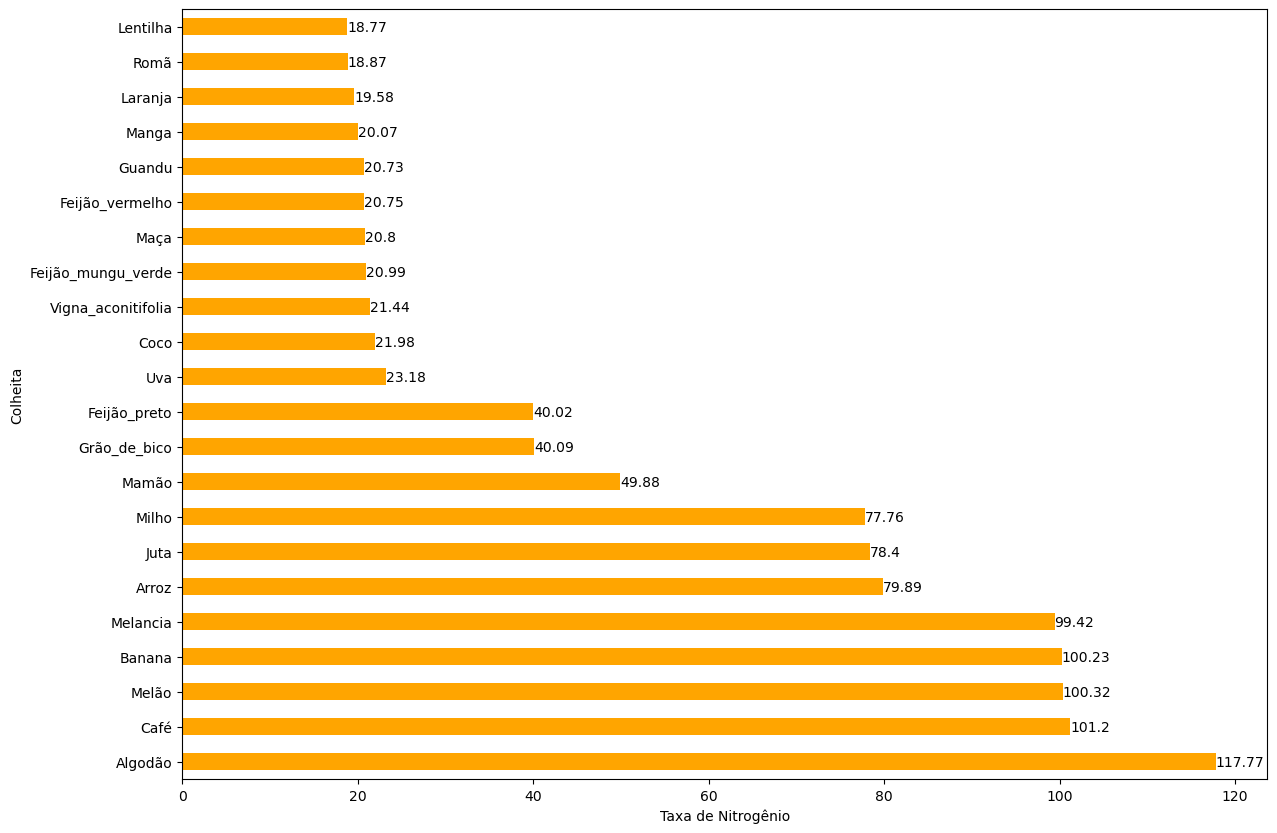

In [29]:
filtro_1_plot = filtro_1.plot(kind='barh', figsize=(14,10), color='orange', xlabel='Taxa de Nitrogênio')
for i in filtro_1_plot.patches:
    filtro_1_plot.annotate(
        i.get_width(),
        (i.get_width(), i.get_y() + i.get_height() / 2),
        va="center", ha="left", color='black'
    )

### Taxa média de fósforo por tipo de colheita

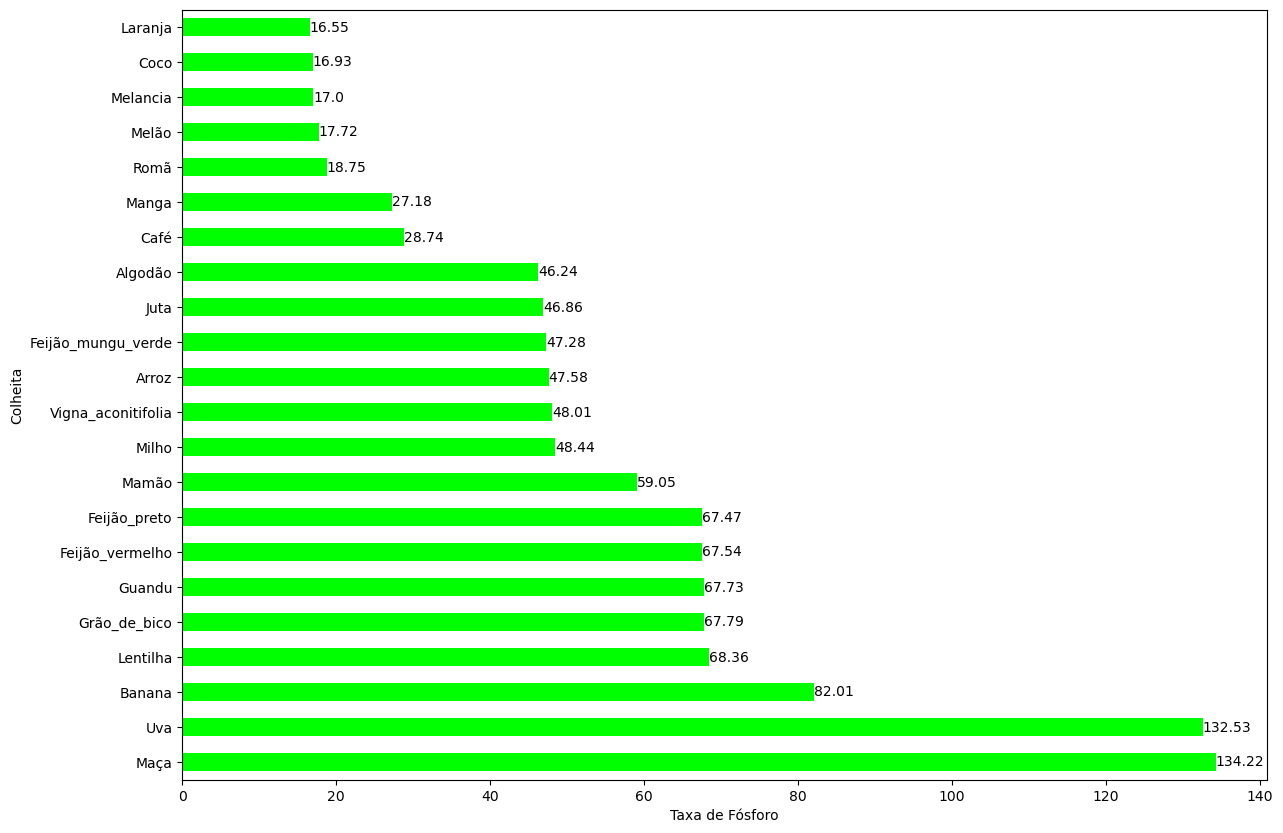

In [30]:
filtro_2_plot = filtro_2.plot(kind='barh', figsize=(14,10), color='lime', xlabel='Taxa de Fósforo')
for i in filtro_2_plot.patches:
    filtro_2_plot.annotate(
        i.get_width(),
        (i.get_width(), i.get_y() + i.get_height() / 2),
        va="center", ha="left", color='black'
    )

### Taxa média de potássio por tipo de colheita

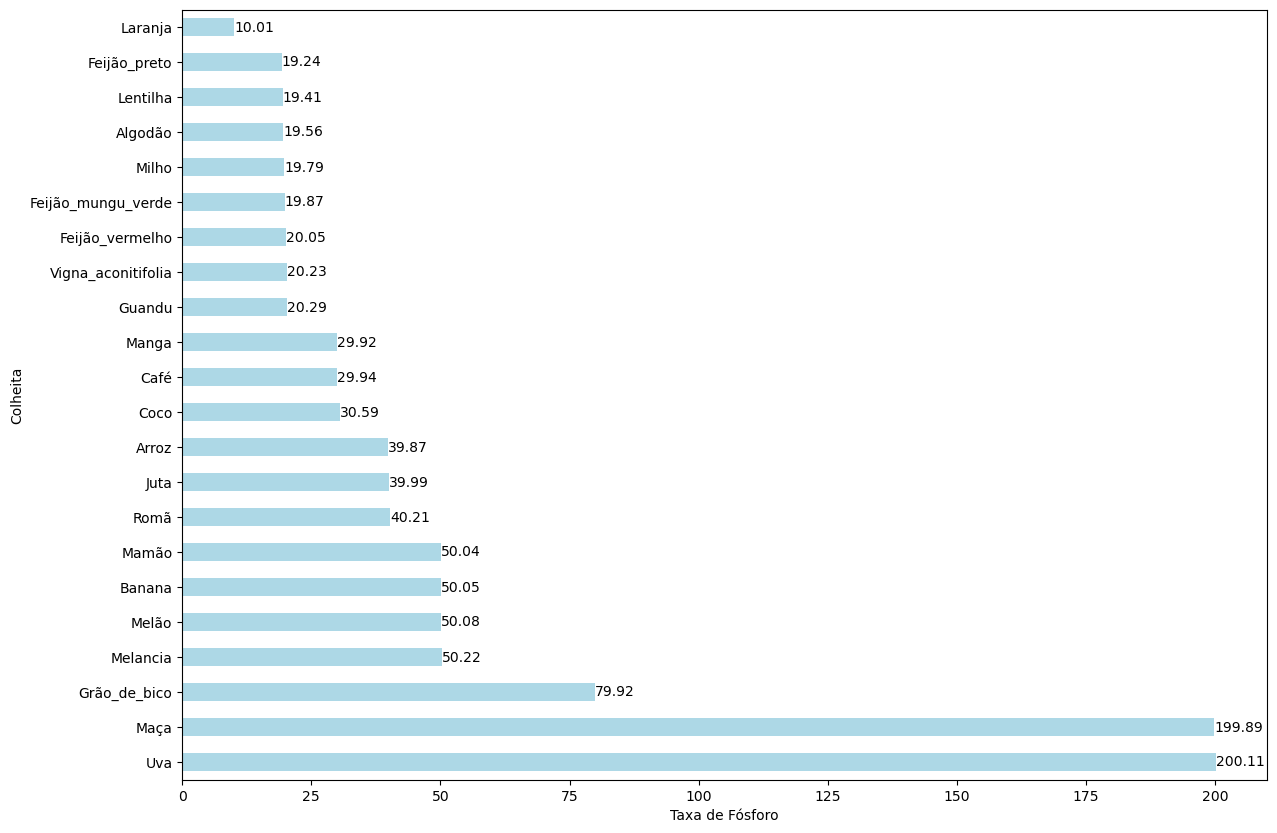

In [31]:
filtro_3_plot = filtro_3.plot(kind='barh', figsize=(14,10), color='lightblue', xlabel='Taxa de Fósforo')
for i in filtro_3_plot.patches:
    filtro_3_plot.annotate(
        i.get_width(),
        (i.get_width(), i.get_y() + i.get_height() / 2),
        va="center", ha="left", color='black'
    )

### Taxa média de temperatura por tipo de colheita

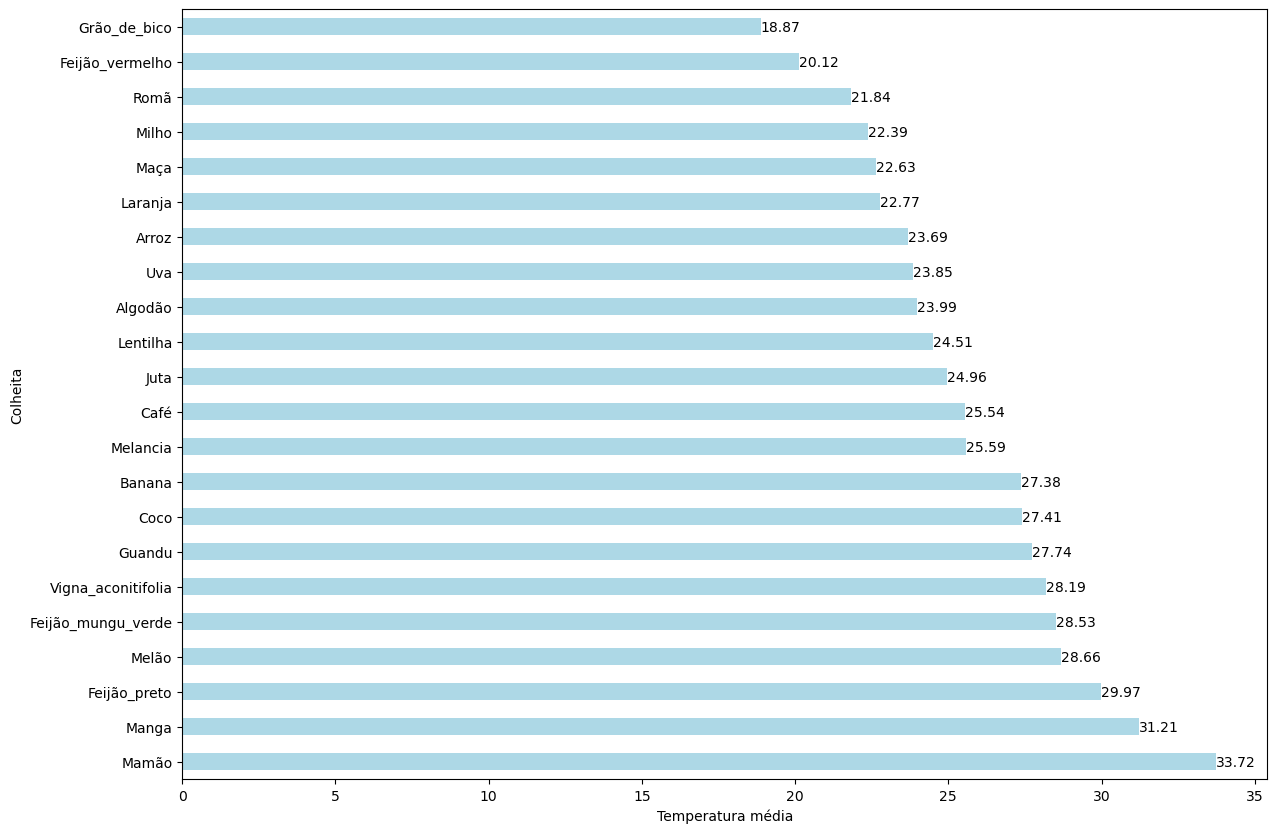

In [32]:
filtro_4_plot = filtro_4.plot(kind='barh', figsize=(14,10), color='lightblue', xlabel='Temperatura média')
for i in filtro_4_plot.patches:
    filtro_4_plot.annotate(
        i.get_width().round(2),
        (i.get_width(), i.get_y() + i.get_height() / 2),
        va="center", ha="left", color='black'
    )

### Taxa média de umidade por tipo de colheita

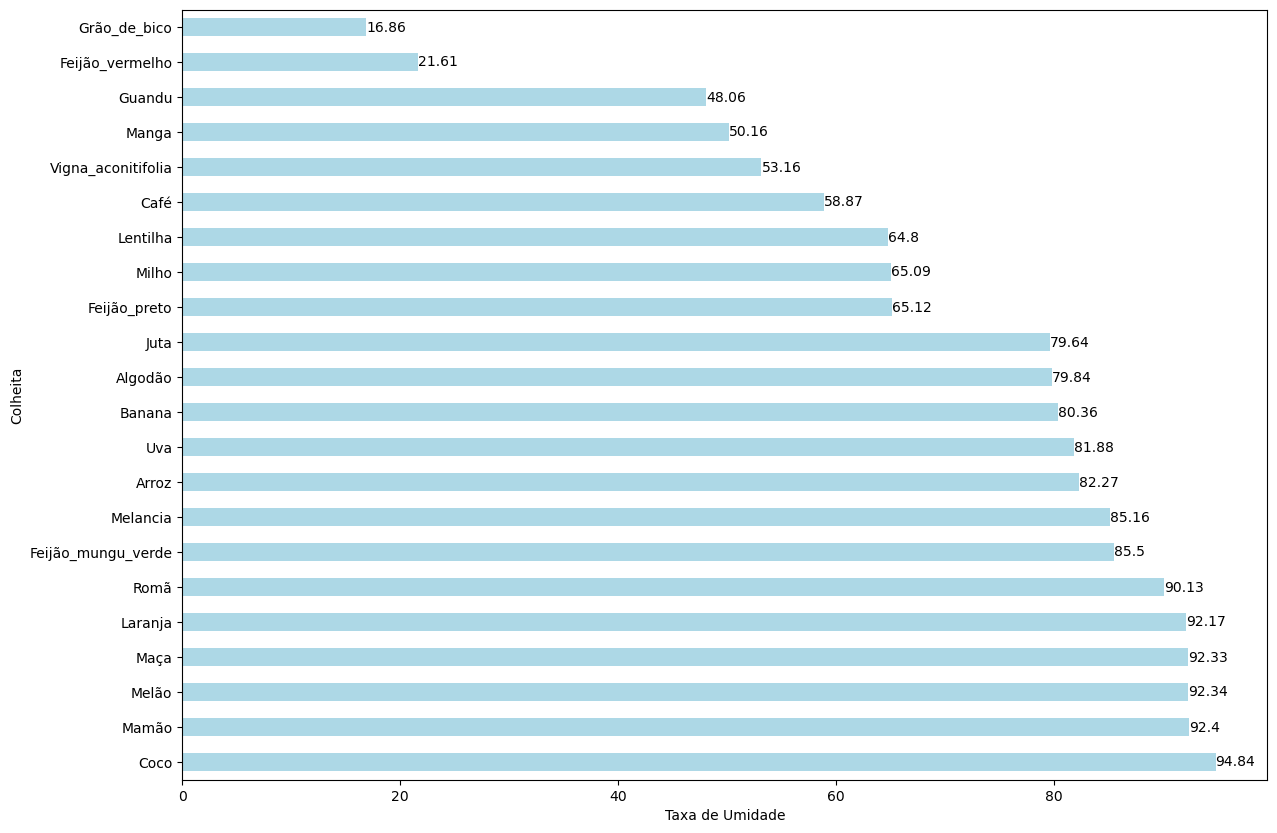

In [33]:
filtro_5_plot = filtro_5.plot(kind='barh', figsize=(14,10), color='lightblue', xlabel='Taxa de Umidade')
for i in filtro_5_plot.patches:
    filtro_5_plot.annotate(
        i.get_width().round(2),
        (i.get_width(), i.get_y() + i.get_height() / 2),
        va="center", ha="left", color='black'
    )

### Taxa média de valor de ph por tipo de colheita

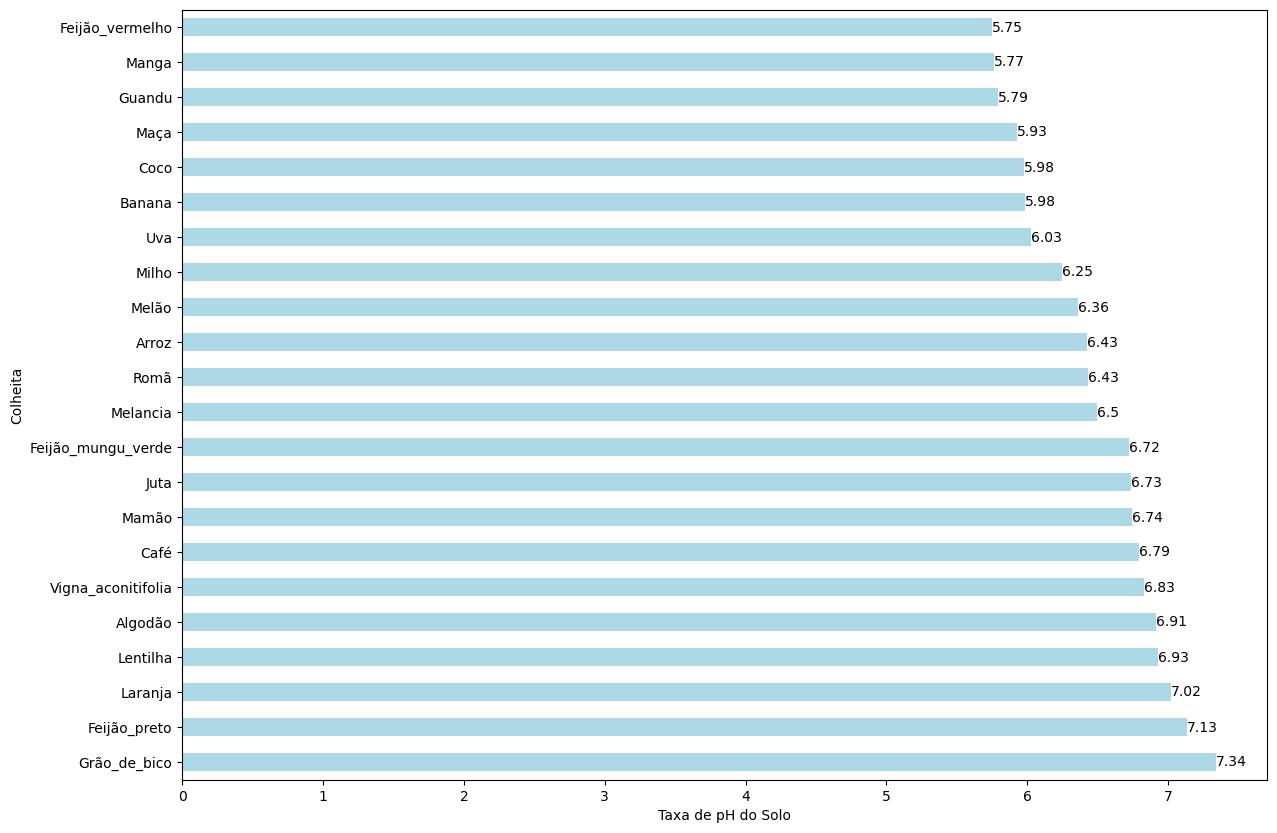

In [34]:
filtro_6_plot = filtro_6.plot(kind='barh', figsize=(14,10), color='lightblue', xlabel='Taxa de pH do Solo')
for i in filtro_6_plot.patches:
    filtro_6_plot.annotate(
        i.get_width().round(2),
        (i.get_width(), i.get_y() + i.get_height() / 2),
        va="center", ha="left", color='black'
    )

### Taxa média de milimetragem de chuva por tipo de colheita

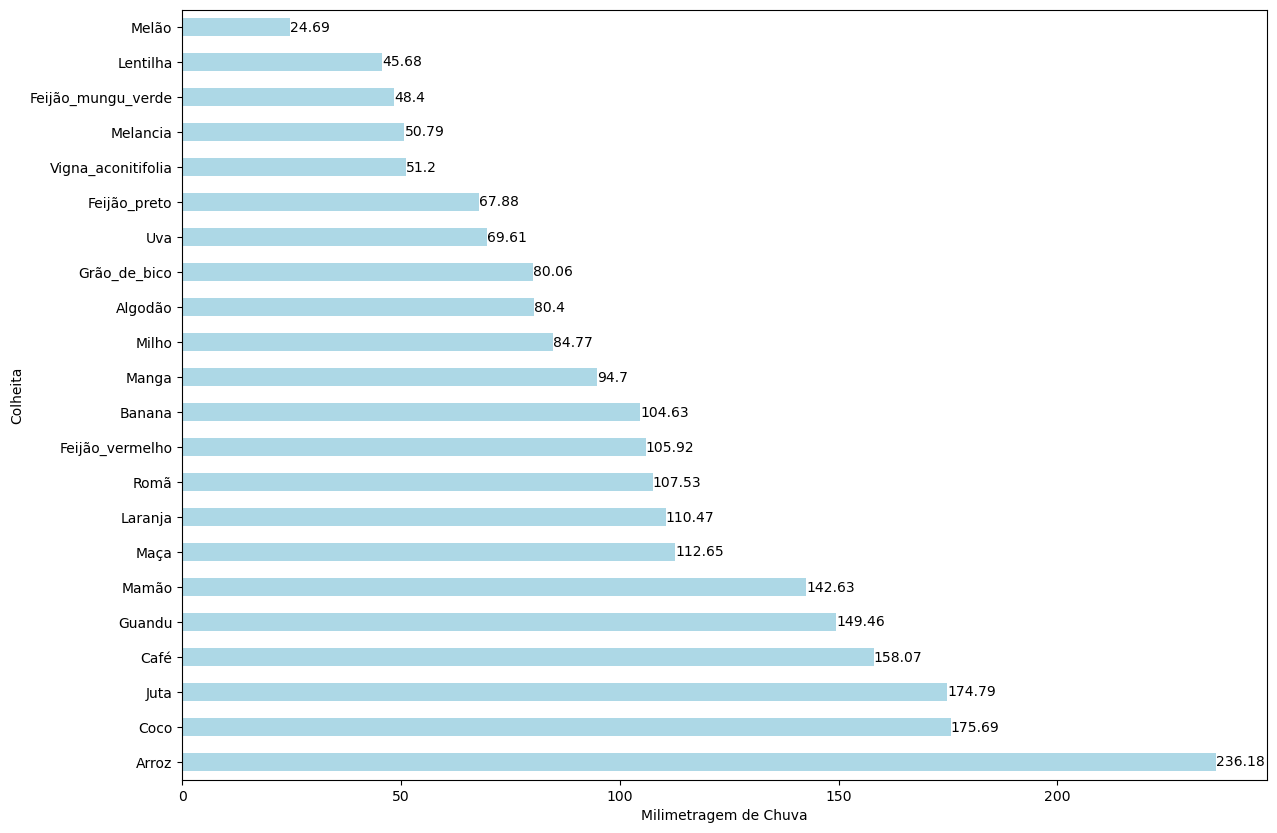

In [35]:
filtro_7_plot = filtro_7.plot(kind='barh', figsize=(14,10), color='lightblue', xlabel='Milimetragem de Chuva')
for i in filtro_7_plot.patches:
    filtro_7_plot.annotate(
        i.get_width().round(2),
        (i.get_width(), i.get_y() + i.get_height() / 2),
        va="center", ha="left", color='black'
    )

## Tratamento e separação de dados para Treinamento do Modelo

In [60]:
dados_brutos.head()

,Nitrogenio,Fosforo,Potassio,Temperatura,Umidade,Valor_pH,Chuva_mm,Colheita
0,90.0,42.0,43.0,20.906250,82.0000,6.500000,203.000,0
1,85.0,58.0,41.0,21.796875,80.3125,7.039062,226.625,0
2,60.0,55.0,44.0,23.000000,82.3125,7.839844,264.000,0
3,74.0,35.0,40.0,26.500000,80.1875,6.980469,242.875,0
4,78.0,42.0,42.0,20.093750,81.6250,7.628906,262.750,0


In [37]:
# Formatando as casas decimais para facilitar a classificação.

In [59]:
dados_brutos['Temperatura'] = dados_brutos['Temperatura'].astype(np.float16).round(1)

In [39]:
dados_brutos['Umidade'] = dados_brutos['Umidade'].round(2).astype(np.float16)

In [40]:
dados_brutos['Valor_pH'] = dados_brutos['Valor_pH'].round(2).astype(np.float16)

In [41]:
dados_brutos['Chuva_mm'] = dados_brutos['Chuva_mm'].round(2).astype(np.float16)

In [42]:
# Convertendo, "Nitrogenio", "Fosforo" e "Potassio" para float

In [43]:
dados_brutos['Nitrogenio'] = dados_brutos['Nitrogenio'].astype(np.float16)

In [44]:
dados_brutos['Fosforo'] = dados_brutos['Fosforo'].astype(np.float16)

In [45]:
dados_brutos['Potassio'] = dados_brutos['Potassio'].astype(np.float16)

In [46]:
dados_brutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogenio   2200 non-null   float16
 1   Fosforo      2200 non-null   float16
 2   Potassio     2200 non-null   float16
 3   Temperatura  2200 non-null   float16
 4   Umidade      2200 non-null   float16
 5   Valor_pH     2200 non-null   float16
 6   Chuva_mm     2200 non-null   float16
 7   Colheita     2200 non-null   object 
dtypes: float16(7), object(1)
memory usage: 47.4+ KB


In [47]:
# Codificando os targets

In [48]:
target_cod = {
    
}

for i, k in enumerate(dados_brutos['Colheita'].unique()):
    target_cod[k] = i

In [49]:
target_cod_ = target_cod.copy()

In [50]:
target_cod_

{'Arroz': 0,
 'Milho': 1,
 'Grão_de_bico': 2,
 'Feijão_vermelho': 3,
 'Guandu': 4,
 'Vigna_aconitifolia': 5,
 'Feijão_mungu_verde': 6,
 'Feijão_preto': 7,
 'Lentilha': 8,
 'Romã': 9,
 'Banana': 10,
 'Manga': 11,
 'Uva': 12,
 'Melancia': 13,
 'Melão': 14,
 'Maça': 15,
 'Laranja': 16,
 'Mamão': 17,
 'Coco': 18,
 'Algodão': 19,
 'Juta': 20,
 'Café': 21}

In [62]:
# separando targets e features para tratamento numerico final.

In [65]:
targets_ = dados_brutos['Colheita'].values

In [67]:
# Separando dataframe bruto de pre tratado

In [68]:
dados_numericos = dados_brutos.copy(deep=True)

In [69]:
dados_numericos.drop('Colheita',axis=1, inplace=True)

In [79]:
dados_numericos

,Nitrogenio,Fosforo,Potassio,Temperatura,Umidade,Valor_pH,Chuva_mm
0,90.0,42.0,43.0,20.906250,82.00000,6.500000,203.0000
1,85.0,58.0,41.0,21.796875,80.31250,7.039062,226.6250
2,60.0,55.0,44.0,23.000000,82.31250,7.839844,264.0000
3,74.0,35.0,40.0,26.500000,80.18750,6.980469,242.8750
4,78.0,42.0,42.0,20.093750,81.62500,7.628906,262.7500
...,...,...,...,...,...,...,...
2195,107.0,34.0,32.0,26.796875,66.43750,6.781250,177.7500
2196,99.0,15.0,27.0,27.406250,56.62500,6.089844,127.9375
2197,118.0,33.0,30.0,24.093750,67.25000,6.359375,173.3750
2198,117.0,32.0,34.0,26.296875,52.12500,6.761719,127.1875


In [72]:
dados_numericos.to_csv('dados_numericos.csv', sep=',', header=False, index=False)

In [74]:
# Tratamento numerico - Numpy

In [78]:
features_array = np.genfromtxt('dados_numericos.csv', delimiter=',')
features_array

array([[ 90.  ,  42.  ,  43.  , ...,  82.  ,   6.5 , 203.  ],
       [ 85.  ,  58.  ,  41.  , ...,  80.3 ,   7.04, 226.6 ],
       [ 60.  ,  55.  ,  44.  , ...,  82.3 ,   7.84, 264.  ],
       ...,
       [118.  ,  33.  ,  30.  , ...,  67.25,   6.36, 173.4 ],
       [117.  ,  32.  ,  34.  , ...,  52.12,   6.76, 127.2 ],
       [104.  ,  18.  ,  30.  , ...,  60.4 ,   6.78, 141.  ]])

## Treinamento do Modelo

In [80]:
X = features_array
y = targets_

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [86]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [87]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [90]:
y_pred = model.predict(X_test)

In [91]:
accuracy = accuracy_score(y_test,y_pred)

In [94]:
print(f'Acurácia = {"{:.2f}".format(accuracy * 100)}%')

Acurácia = 99.24%
